In [1]:
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pytesseract as tes
from matplotlib.backends.backend_pdf import PdfPages

In [79]:
cap = cv2.VideoCapture("Videos/Full_font2.avi")

In [ ]:
## Saving
# fps =int(cap.get(cv2.CAP_PROP_FPS))
# diap = tqdm(iterable=range(0,fps*40,fps))
# for i in diap:
#     cap.set(cv2.CAP_PROP_POS_FRAMES, i)
#     ret, frame = cap.read()
#     if ret:
#         cv2.imwrite(f"Images/frame{int(i/fps)}.jpg",frame)

In [77]:
def recognize(image,thresh):
    frame_2color = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, frame_bw = cv2.threshold(frame_2color, thresh, 255, cv2.THRESH_BINARY)
    return tes.image_to_string(frame_bw),frame_bw

In [90]:
# Check
THRESH = 147

cap = cv2.VideoCapture("Videos/Full_font2.avi")
pdf_file = PdfPages('Full_font2.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
diap = tqdm(iterable=range(0, fps * 40, fps))

for i in diap:
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ready, frame = cap.read()
    text, frame_treated = recognize(frame, thresh=THRESH)
    text = text.replace('\n','')
    text = f"t={i/fps: .1f}|{text}"
    if ready:
        fig, (ax_row, ax_treated) = plt.subplots(ncols=2)

        ax_row.imshow(frame)
        ax_treated.imshow(frame_treated)
        ax_row.text(0, 0, text, fontsize=15)
        
        fig.savefig(pdf_file, format='pdf')
        plt.close()
pdf_file.close()

100%|██████████| 40/40 [00:09<00:00,  4.19it/s]


# One frame tests

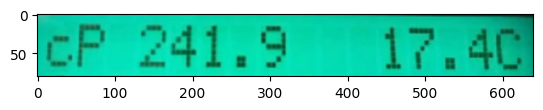

In [3]:
cap = cv2.VideoCapture("Videos/Start1.avi")
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ready, frame = cap.read()
frame = frame[200:280]
plt.imshow(frame)

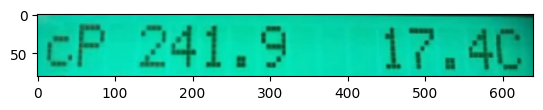

In [5]:
frame2 = frame[:,:,:]
frame2 = (frame2+1)%256
plt.imshow(frame2)

In [2]:
import easyocr

In [3]:
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [10]:
result = reader.readtext(frame)

# test easy ocr

In [19]:
cap = cv2.VideoCapture("Videos/Start5.avi")
pdf_file = PdfPages('Easy_Start5_test.pdf')

fps = int(cap.get(cv2.CAP_PROP_FPS))
video_len = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)/fps)


diap = tqdm(iterable=range(fps *87, fps * 89, int(fps/5)))
try:
    for i in diap:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ready, frame = cap.read()
        frame= frame[100:142]
        result = reader.readtext(frame)
        
        if ready:
            fig, ax = plt.subplots()

            ax.imshow(frame)
            text_result = ' -- '.join([f'{value}({confidence*100:.0f})' for _,value,confidence in result])
            ax.set_title(f'T= {round(i/fps,1)}  R= {text_result}')
            
            fig.savefig(pdf_file, format='pdf')
            plt.close()
except:
    print('Error has been detected')
finally:
    pdf_file.close()

100%|██████████| 10/10 [00:02<00:00,  4.87it/s]


In [18]:
' '.join([value for _,value,confidence in result])

'CP 241.9 17.4C'